In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_quiz.csv to dataset_quiz.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('dataset_quiz.csv')
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


# **Visualisasi Jumlah Luaran Setiap Tahun**

In [11]:
conditions = [
    (df['luaran_hki'] == 'TIDAK ADA') & (df['luaran_lain'] == 'TIDAK ADA' ),
    (df['luaran_hki'] == 'TIDAK ADA') & (df['luaran_lain'] == 'YA'),
    (df['luaran_hki'] == 'ADA') & (df['luaran_lain'] == 'TIDAK ADA'),
    (df['luaran_hki'] == 'ADA') & (df['luaran_lain'] == 'YA')
]

#define results
results = [0, 1, 1, 2]

#create new column based on conditions in column1 and column2
df['jumlah_luaran'] = np.select(conditions, results)


print = df.iloc[:,16:]
print.head()

,jumlah_luaran
0,0
1,0
2,0
3,0
4,0


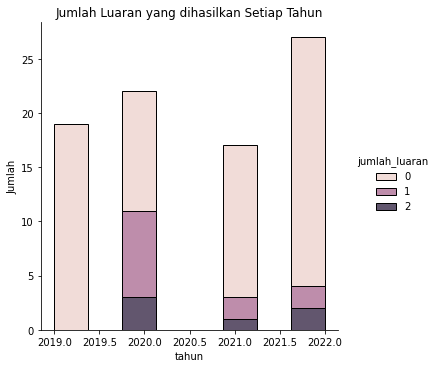

In [13]:
ax = sns.displot(df, x="tahun", hue="jumlah_luaran", multiple="stack")
ax.set(title = 'Jumlah Luaran yang dihasilkan Setiap Tahun', xlabel = 'tahun', ylabel='Jumlah');

# **Jenis Luaran Lain yang dihasilkan Setiap Tahun**

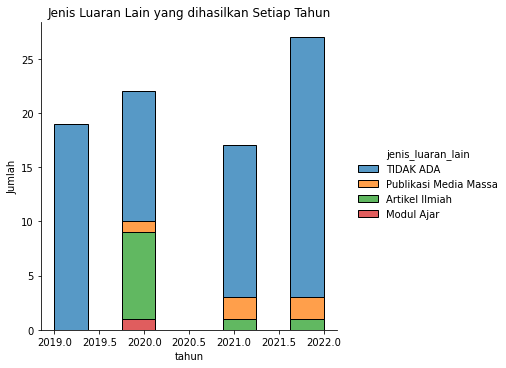

In [4]:
ax = sns.displot(df, x="tahun", hue="jenis_luaran_lain", multiple="stack")
ax.set(title = 'Jenis Luaran Lain yang dihasilkan Setiap Tahun', xlabel = 'tahun', ylabel='Jumlah');

# **Total Skema terlibat Setiap Tahun**

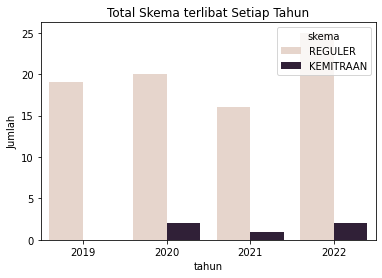

In [5]:
ax1 = sns.countplot(x="tahun", hue="skema", palette="ch:.10", data=df);
ax1.set(title = 'Total Skema terlibat Setiap Tahun', xlabel = 'tahun', ylabel='Jumlah');

# **Menghitung Presentase Jumlah Valounter yang terlibat berdasarkan sekema**

In [6]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('skema', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('skema', axis=0)))

df_continents = df_continents.iloc[:,-2:-1]
df_continents.rename(
    columns=({'jml_vltr_terlibat' : 'total valounteer'}),
    inplace = True,
)
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,total valounteer
skema,
KEMITRAAN,7
REGULER,107


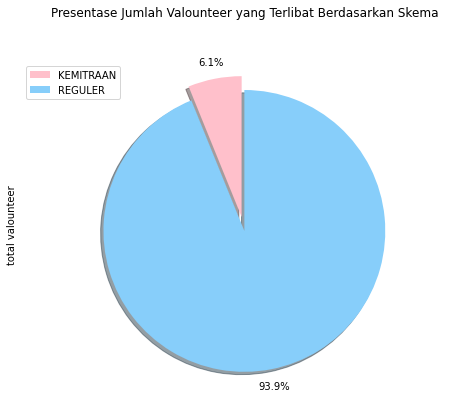

In [7]:
colors_list = ['pink', 'lightskyblue']
explode_list = [0.1, 0,] # ratio for each continent with which to offset each wedge.

df_continents['total valounteer'].plot(kind='pie',
                            figsize=(8, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Presentase Jumlah Valounteer yang Terlibat Berdasarkan Skema', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# **Menghitung jumlah keterlibatan volunteer**

In [8]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('keterlibatan_vltr', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('keterlibatan_vltr', axis=0)))

#menghapus column id ketua, id anggota dan tahun
del df_continents['id_ketua']
del df_continents['id_anggota1']
del df_continents['id_anggota2']
del df_continents['id_anggota3']
del df_continents['id_anggota4']
del df_continents['id_anggota5']
del df_continents['tahun']
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,jml_vltr_terlibat
keterlibatan_vltr,
TIDAK,2
YA,112


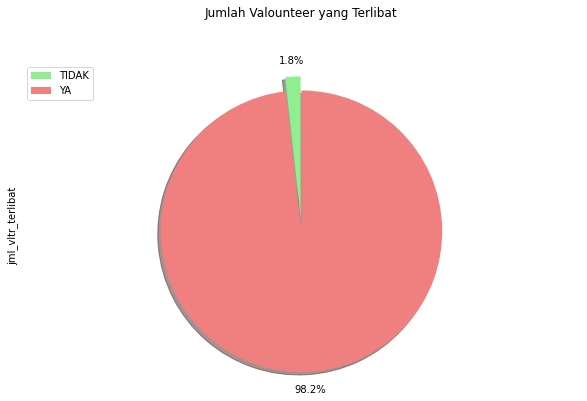

In [9]:
colors_list = ['lightgreen', 'lightcoral']
explode_list = [0.1, 0,] # ratio for each continent with which to offset each wedge.

df_continents['jml_vltr_terlibat'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Jumlah Valounteer yang Terlibat', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()